<a href="https://colab.research.google.com/github/AKASH4671/time-series-analysis/blob/main/Anomaly_Detection_in_Multivariate_Time_Series_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [ ]:
dataFrame = pd.read_excel('/content/drive/MyDrive/data.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
dataFrame.head(5)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
dataFrame['time'] = pd.to_datetime(dataFrame['time'], infer_datetime_format = True)

In [ ]:
dataFrame.set_index('time', inplace=True)

In [ ]:
# converting obj data type to float
object_columns = dataFrame.select_dtypes(include='object').columns
dataFrame[object_columns] = dataFrame[object_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')

print(dataFrame.dtypes)

Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
dtype: object


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

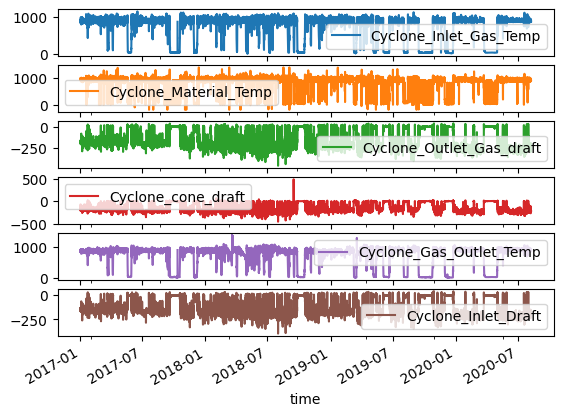

In [ ]:
dataFrame[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Gas_Outlet_Temp','Cyclone_Inlet_Draft']].plot(subplots = True)

In [ ]:
# checking nan values
dataFrame.isna().sum()

Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [ ]:
dataFrame.fillna(method = 'ffill')

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...
2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94
2020-08-07 12:05:00,887.20,895.70,-230.11,-214.65,885.32,-179.18


In [ ]:
df = dataFrame.resample('W').mean()

In [ ]:
df.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,727.305013,750.885125,-177.626096,-164.386331,715.742675,-141.144085
std,297.126597,303.969156,85.078891,76.861112,293.697478,66.364900
min,17.244588,5.267510,-282.347401,-266.940575,17.125208,-221.725947
25%,726.904945,766.334712,-235.373090,-215.935937,713.875432,-185.288294
50%,883.360526,909.741815,-206.565263,-193.416446,860.714559,-163.503547
75%,892.066715,924.274203,-160.378924,-150.737852,889.260536,-125.636225
max,916.505451,964.243638,4.993393,1.525198,935.195278,2.734271


In [ ]:
# using standard scaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
split = int(0.8 * len(df_scaled))

In [ ]:
train_data, test_data = df_scaled[:split], df_scaled[split:]

In [ ]:
train_data.shape, test_data.shape

((151, 6), (38, 6))

In [ ]:
n_steps = 10 # Number of time steps to consider
n_features = df_scaled.shape[1] ## Number of features in the dataset

In [ ]:
# preparation for training data
X_train, y_train = [], []
for i in range(n_steps, len(train_data)):
    X_train.append(train_data[i - n_steps:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# # preparation for testing data
X_test, y_test = [], []
for i in range(n_steps, len(test_data)):
    X_test.append(test_data[i - n_steps:i])
    y_test.append(test_data[i])

X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_train.shape , X_test.shape

((141, 10, 6), (28, 10, 6))

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.5))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')])

Epoch 1/50
5/5 [==============================] - 2s 67ms/step - loss: 0.9312 - val_loss: 1.2625
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 0.9071 - val_loss: 1.2053
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 0.8729 - val_loss: 1.1680
Epoch 4/50
5/5 [==============================] - 0s 25ms/step - loss: 0.8470 - val_loss: 1.1300
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 0.8328 - val_loss: 1.0924
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.8344 - val_loss: 1.0516
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 0.8297 - val_loss: 1.0144
Epoch 8/50
5/5 [==============================] - 0s 20ms/step - loss: 0.8148 - val_loss: 0.9739
Epoch 9/50
5/5 [==============================] - 0s 21ms/step - loss: 0.7694 - val_loss: 0.9246
Epoch 10/50
5/5 [==============================] - 0s 26ms/step - loss: 0.7367 - val_loss: 0.8708
Epoch 11/50
5/5 [============

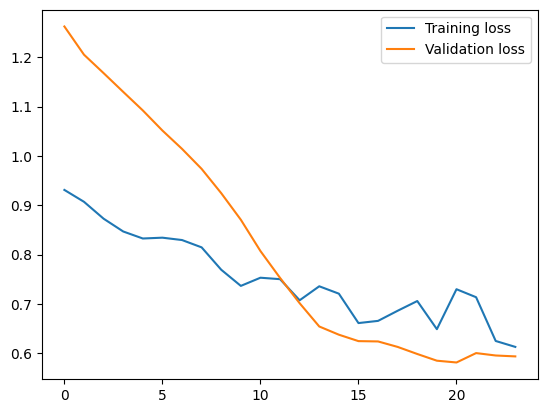

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 141ms/step


(31, 6)

In [ ]:
mse = np.mean(np.square(y_pred - y_test), axis=1)
mean_mse = np.mean(mse)
std_mse = np.std(mse)
threshold = mean_mse + 2 * std_mse
anomalies = mse > threshold
np.where(anomalies)

(array([11]),)